In [1]:
import os
import SimpleITK as sitk

import pandas as pd
import seaborn as sns



In [2]:
root_dir = r'\\allen\programs\celltypes\workgroups\mousecelltypes\SarahWB\ccf_slice_registration\ccf_reg_output'

In [3]:
bad_transforms = ['Slc17a6-IRES-Cre;Ai14-564187.03.09', 'Esr2-IRES2-Cre;Ai14-557045.05.09'] #two cells from RD
bad_transforms.append('Chat-IRES-Cre-neo;Ai14-623124.07.04') #found looking at transforms
bad_transforms.append('Chat-IRES-Cre-neo;Ai14-586528.05.04')
bad_transforms.append('Chat-IRES-Cre-neo;Ai14-564233.06.09')

In [4]:
unsure_transforms = ['Slc17a8-iCre;Slc32a1-IRES2-FlpO;Ai65-560685.08.06', 'Vip-IRES-Cre;Ai14-579326.07.03']

In [8]:

slice_dict = {}

for slice_name in os.listdir(root_dir):
    transform_path = os.path.join(root_dir, slice_name, 'overview_to_virtual_slice_transform.txt')
    if os.path.isfile(transform_path):
        affine_transform = sitk.ReadTransform(transform_path)
        params = list(affine_transform.GetParameters())
        if slice_name in bad_transforms: params.append('bad')
        elif slice_name in unsure_transforms: params.append('unsure')
        else: params.append('good')
        slice_dict[slice_name] = params

In [9]:
slice_df = pd.DataFrame.from_dict(slice_dict, orient='index', columns=['param0', 'param1', 'param2', 'param3', 'param4', 'param5','status'])
slice_df = slice_df.reset_index()
slice_df = slice_df.rename(columns={'index':'slice_name'})
slice_df

,slice_name,param0,param1,param2,param3,param4,param5,status
0,C57BL6J-581849.07.03,1.017407,0.146974,0.136799,1.148465,1235.769558,2272.487172,good
1,C57BL6J-581850.06.03,1.022643,0.160598,-0.009595,1.249135,1766.104867,2249.007015,good
2,C57BL6J-581851.08.03,1.162176,-0.002492,-0.049228,1.230737,1431.955243,2579.292479,good
3,C57BL6J-588656.06.04,-1.116366,0.041666,0.002630,1.143488,10992.243367,2601.624239,good
4,C57BL6J-617127.16.09,1.019365,-0.093228,0.168420,1.284514,1494.140118,561.081254,good
...,...,...,...,...,...,...,...,...
106,Vip-IRES-Cre;Ai14-609322.06.04,0.762165,0.151942,0.119643,0.976232,5176.406205,3196.405537,good
107,Vip-IRES-Cre;Ai14-614426.05.03,0.975093,-0.172081,0.031293,1.067686,2566.918263,2468.284763,good
108,Vip-IRES-Cre;Ai14-614430.05.04,0.850010,0.006718,-0.047817,1.191871,6030.257151,2975.907978,good
109,Vip-IRES-Cre;Ai14-618853.06.04,-0.887450,0.233691,0.589703,1.300876,9931.907355,-129.376170,good


<AxesSubplot:xlabel='param0', ylabel='status'>

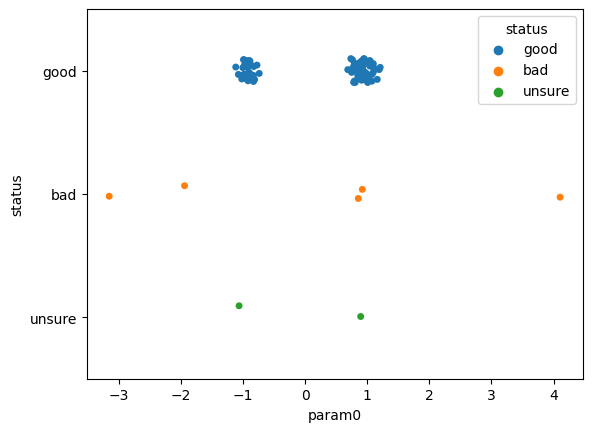

In [11]:
sns.stripplot(data = slice_df, x='param0', y='status', hue='status')

<AxesSubplot:xlabel='param1', ylabel='status'>

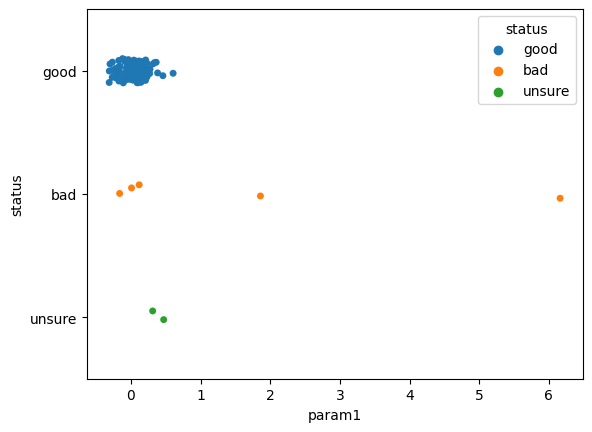

In [12]:
sns.stripplot(data = slice_df, x='param1', y='status', hue='status')

<AxesSubplot:xlabel='param2', ylabel='status'>

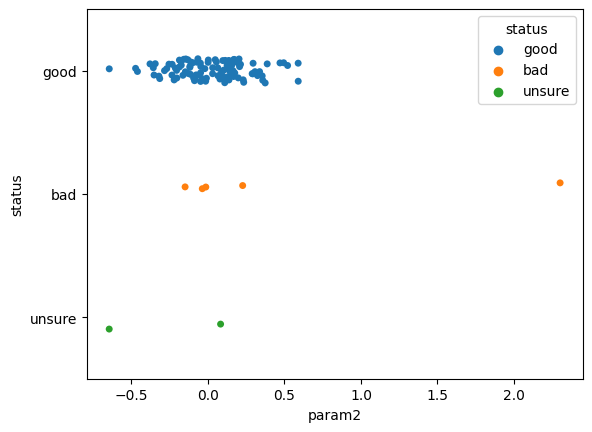

In [13]:
sns.stripplot(data = slice_df, x='param2', y='status', hue='status')

<AxesSubplot:xlabel='param3', ylabel='status'>

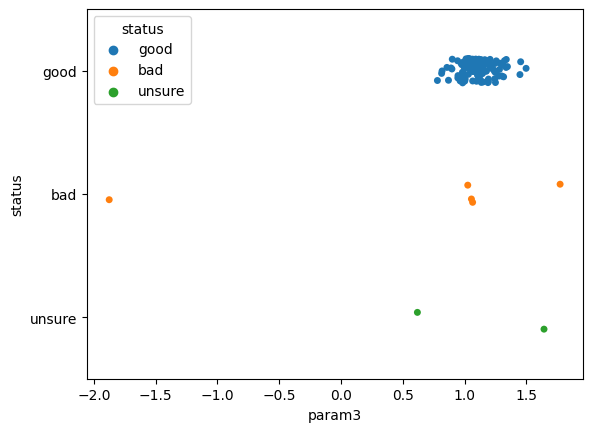

In [14]:
sns.stripplot(data = slice_df, x='param3', y='status', hue='status')

<Axes: xlabel='param4', ylabel='status'>

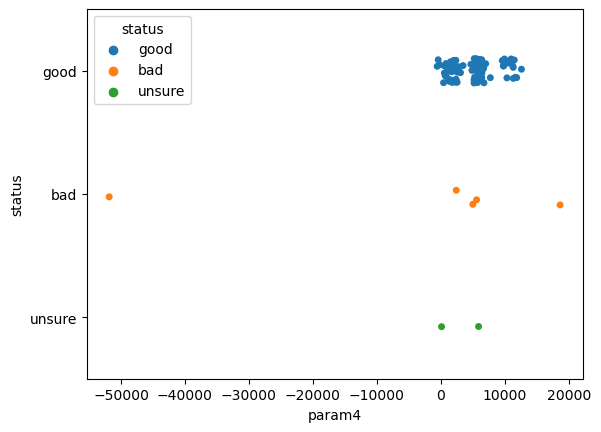

In [11]:
sns.stripplot(data = slice_df, x='param4', y='status', hue='status')

<Axes: xlabel='param5', ylabel='status'>

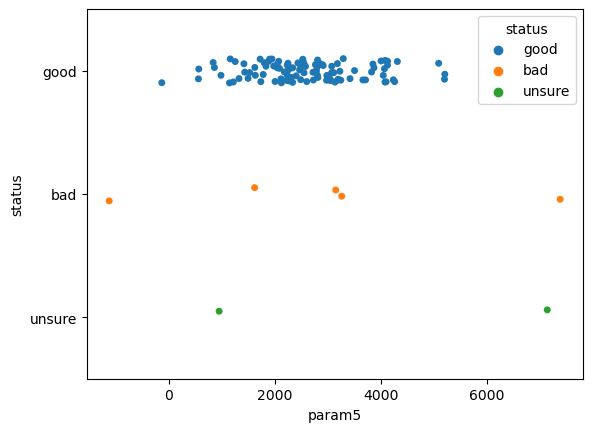

In [12]:
sns.stripplot(data = slice_df, x='param5', y='status', hue='status')

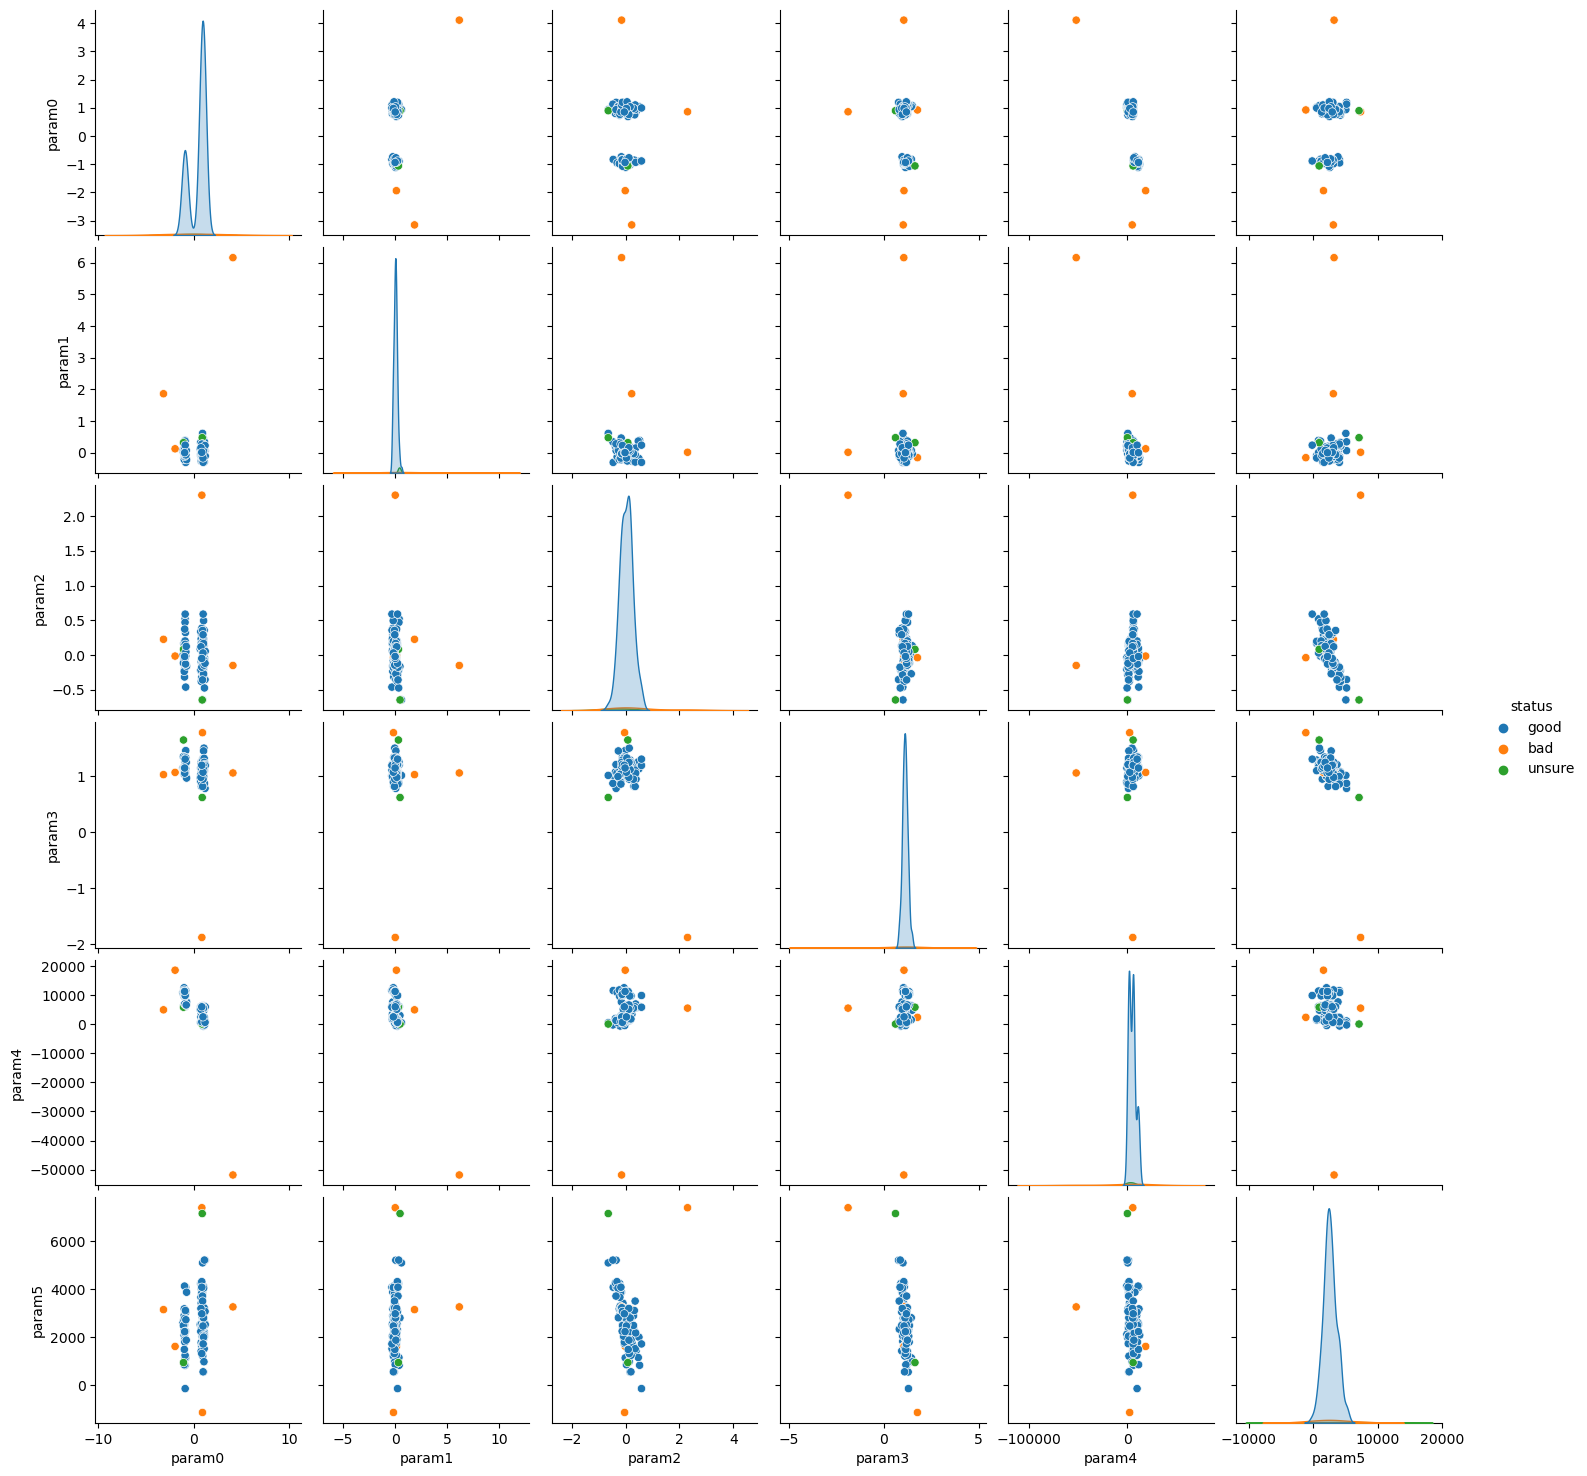

In [15]:
sns.pairplot(slice_df[['param0', 'param1', 'param2', 'param3', 'param4', 'param5','status']], hue='status')


threshold and check vs gt

In [20]:
test_status = []
for i,c in slice_df.iterrows():
    if abs(c.param0) > 1.5 or c.param1 > 1 or abs(c.param2) > 1 or c.param3 < 0 or abs(c.param4) > 30000 or c.param5 < 0 or c.param5 > 5000:
        test_status.append('bad')
    else:
        test_status.append('good')
slice_df['test_status'] = test_status

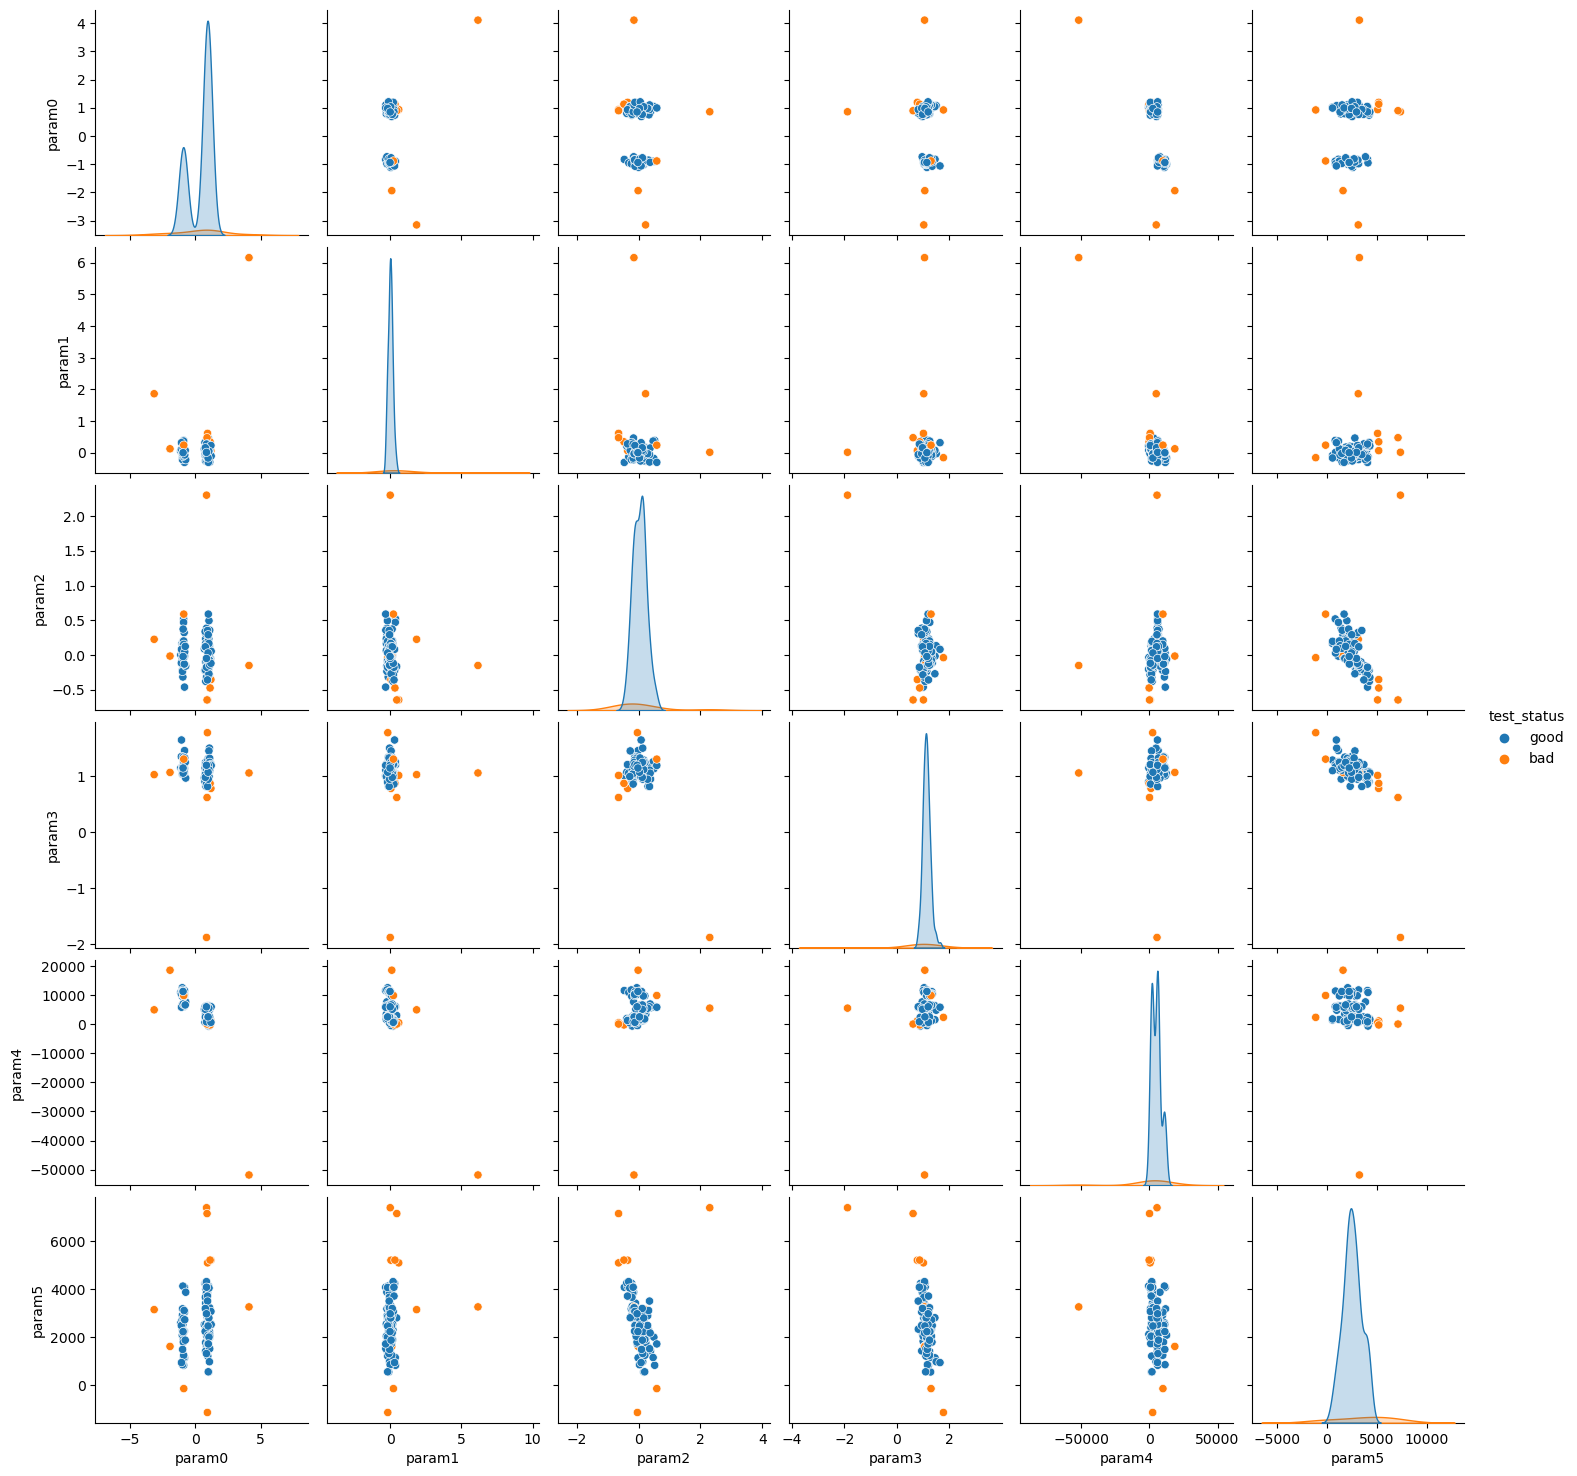

In [21]:
sns.pairplot(slice_df[['param0', 'param1', 'param2', 'param3', 'param4', 'param5','status', 'test_status']], hue='test_status')


In [22]:
slice_df[slice_df['test_status'] == 'bad']

,slice_name,param0,param1,param2,param3,param4,param5,status,test_status
16,Chat-IRES-Cre-neo;Ai14-564233.06.09,0.921259,-0.161243,-0.036601,1.772192,2404.470787,-1120.717590,bad,bad
23,Chat-IRES-Cre-neo;Ai14-586528.05.04,-3.153854,1.859444,0.227142,1.024973,4993.625566,3148.420196,bad,bad
30,Chat-IRES-Cre-neo;Ai14-623124.07.04,0.856924,0.009285,2.301082,-1.876202,5581.164392,7378.150944,bad,bad
38,Esr2-IRES2-Cre;Ai14-557045.05.09,-1.940540,0.118964,-0.013682,1.064292,18634.369160,1620.874708,bad,bad
42,Gad2-IRES-Cre;Ai14-600203.06.03,1.190620,0.060797,-0.351847,0.779442,1161.351752,5199.245656,good,bad
50,Htr3a-Cre_NO152;Ai14-578482.07.03,0.932502,0.606004,-0.644506,1.011039,542.607291,5089.451823,good,bad
71,Slc17a6-IRES-Cre;Ai14-564187.03.09,4.105879,6.161105,-0.148959,1.054606,-51848.421726,3261.857597,bad,bad
74,Slc17a6-IRES-Cre;Ai14-622106.07.03,1.126302,0.339578,-0.472461,0.868925,-210.628358,5204.842378,good,bad
76,Slc17a8-iCre;Slc32a1-IRES2-FlpO;Ai65-560685.08.06,0.895129,0.470459,-0.644850,0.617498,100.515628,7135.986688,unsure,bad
109,Vip-IRES-Cre;Ai14-618853.06.04,-0.887450,0.233691,0.589703,1.300876,9931.907355,-129.376170,good,bad


find min/max cells for various params

In [206]:
good_slice_df = slice_df[slice_df['status'] == 'good']
good_slice_df[good_slice_df.param5 == good_slice_df.param5.max()]

,slice_name,param0,param1,param2,param3,param4,param5,status,param0_status,param1_status,param2_status,param3_status,total_status,param4_status
74,Slc17a6-IRES-Cre;Ai14-622106.07.03,1.126302,0.339578,-0.472461,0.868925,-210.628358,5204.842378,good,True,True,True,True,True,True


In [208]:
good_slice_df.sort_values(by='param5', ascending=False)

,slice_name,param0,param1,param2,param3,param4,param5,status,param0_status,param1_status,param2_status,param3_status,total_status,param4_status
74,Slc17a6-IRES-Cre;Ai14-622106.07.03,1.126302,0.339578,-0.472461,0.868925,-210.628358,5204.842378,good,True,True,True,True,True,True
42,Gad2-IRES-Cre;Ai14-600203.06.03,1.190620,0.060797,-0.351847,0.779442,1161.351752,5199.245656,good,True,True,True,True,True,True
50,Htr3a-Cre_NO152;Ai14-578482.07.03,0.932502,0.606004,-0.644506,1.011039,542.607291,5089.451823,good,True,True,True,True,True,True
56,Pvalb-IRES-Cre;Ai14-553660.05.06,0.851404,0.209595,-0.320075,1.053512,1731.043180,4310.645987,good,True,True,True,True,True,True
45,Gad2-IRES-Cre;Ai14-609670.05.03,0.797844,0.199083,-0.378261,1.072049,1995.676069,4259.410043,good,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,Glt25d2-Cre_NF107;Ai14-570372.07.09,-0.987780,0.003971,0.030720,1.162910,11461.279409,862.588720,good,True,True,True,True,True,True
8,C57BL6J-618128.06.03,-0.896480,0.383367,0.520665,1.198885,6091.660884,838.461412,good,True,True,True,True,True,True
79,Sst-IRES-Cre;Ai14-552310.11.09,0.988202,-0.171311,0.198398,1.095674,1863.914174,567.756176,good,True,False,True,True,True,True
4,C57BL6J-617127.16.09,1.019365,-0.093228,0.168420,1.284514,1494.140118,561.081254,good,True,False,True,True,True,True


In [202]:
slice_df[slice_df.param4 == slice_df.param.max()]

,slice_name,param0,param1,param2,param3,param4,param5,status,param0_status,param1_status,param2_status,param3_status,total_status
38,Esr2-IRES2-Cre;Ai14-557045.05.09,-1.94054,0.118964,-0.013682,1.064292,18634.36916,1620.874708,bad,False,True,True,True,True


param0 thresholding

In [184]:
param0_abs = abs(good_slice_df['param0'])
print(min(param0_abs))
print(max(param0_abs))

0.6872423476843887
1.2092450340937995


<Axes: xlabel='param0', ylabel='status'>

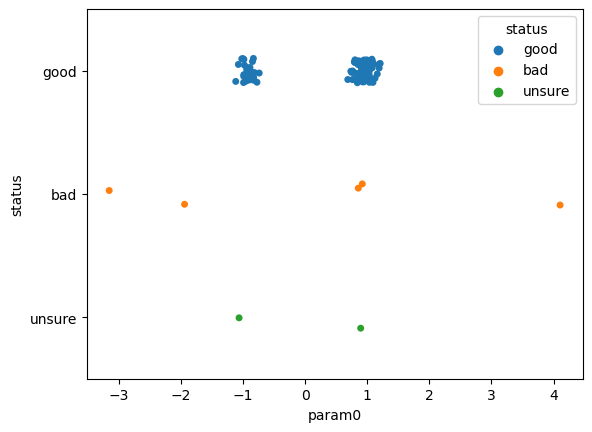

In [218]:
sns.stripplot(data = slice_df, x='param0', y='status', hue='status')

In [219]:
slice_df['param0_status'] = [abs(x)< 2 for x in slice_df['param0'].values]

param1 thresholding

<Axes: xlabel='param1', ylabel='status'>

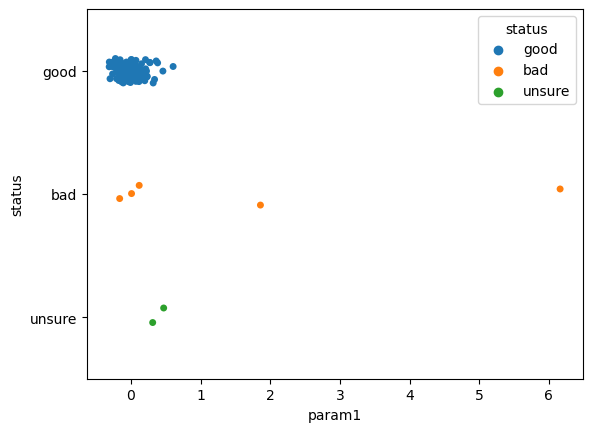

In [187]:
sns.stripplot(data = slice_df, x='param1', y='status', hue='status')

In [220]:
slice_df['param1_status'] = [x < 1 for x in slice_df['param1'].values]


param2 thresholding

<Axes: xlabel='param2', ylabel='status'>

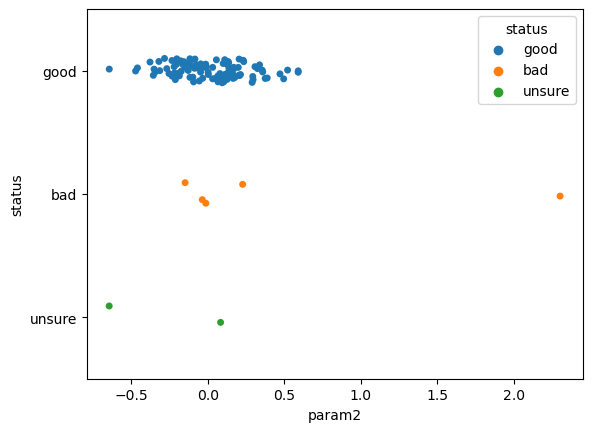

In [217]:
sns.stripplot(data = slice_df, x='param2', y='status', hue='status')

In [221]:
slice_df['param2_status'] = [abs(x) < 1 for x in slice_df['param2'].values]


param3 thresholding

<Axes: xlabel='param3', ylabel='status'>

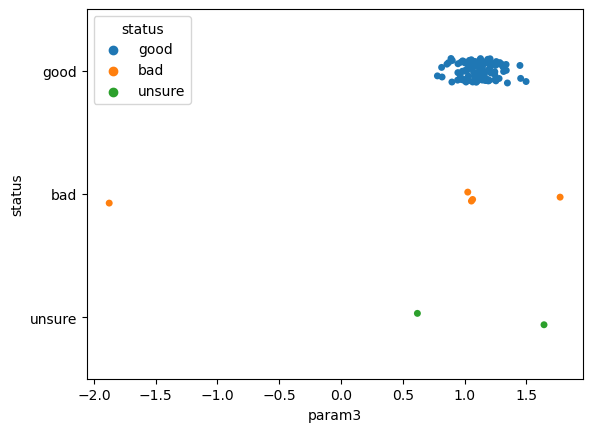

In [216]:
sns.stripplot(data = slice_df, x='param3', y='status', hue='status')

In [222]:
slice_df['param3_status'] = [x > 0 for x in slice_df['param3'].values]


param4 thresholding

<Axes: xlabel='param4', ylabel='status'>

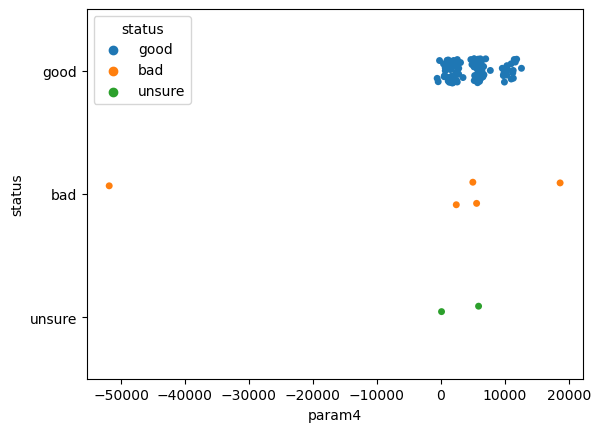

In [201]:
sns.stripplot(data = slice_df, x='param4', y='status', hue='status')

In [223]:
slice_df['param4_status'] = [abs(x) < 30000 for x in slice_df['param4'].values]


param5 thresholding

<Axes: xlabel='param5', ylabel='status'>

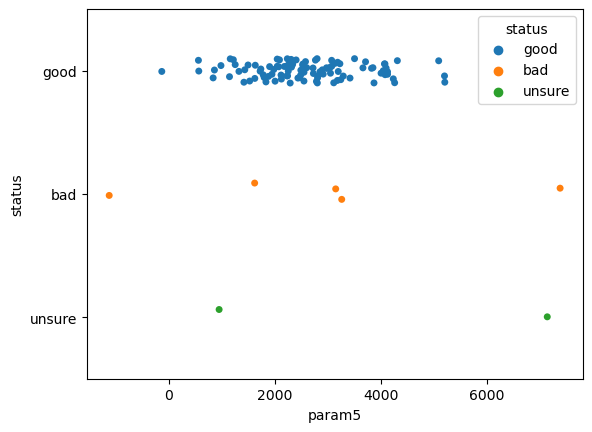

In [224]:
sns.stripplot(data = slice_df, x='param5', y='status', hue='status')

In [225]:
slice_df['param5_status'] = [x > 0 for x in slice_df['param5'].values]


In [226]:
total_status = []
for i,c in slice_df.iterrows():
    total_status.append(all([c.param0_status, c.param1_status, c.param2_status, c.param3_status, c.param4_status, c.param5_status]))
slice_df['total_status'] = total_status

In [229]:
bad_slices = slice_df[slice_df['total_status'] == False]
bad_slices

,slice_name,param0,param1,param2,param3,param4,param5,status,param0_status,param1_status,param2_status,param3_status,total_status,param4_status,param5_status
16,Chat-IRES-Cre-neo;Ai14-564233.06.09,0.921259,-0.161243,-0.036601,1.772192,2404.470787,-1120.717590,bad,True,True,True,True,False,True,False
23,Chat-IRES-Cre-neo;Ai14-586528.05.04,-3.153854,1.859444,0.227142,1.024973,4993.625566,3148.420196,bad,False,False,True,True,False,True,True
30,Chat-IRES-Cre-neo;Ai14-623124.07.04,0.856924,0.009285,2.301082,-1.876202,5581.164392,7378.150944,bad,True,True,False,False,False,True,True
71,Slc17a6-IRES-Cre;Ai14-564187.03.09,4.105879,6.161105,-0.148959,1.054606,-51848.421726,3261.857597,bad,False,False,True,True,False,False,True
109,Vip-IRES-Cre;Ai14-618853.06.04,-0.887450,0.233691,0.589703,1.300876,9931.907355,-129.376170,good,True,True,True,True,False,True,False


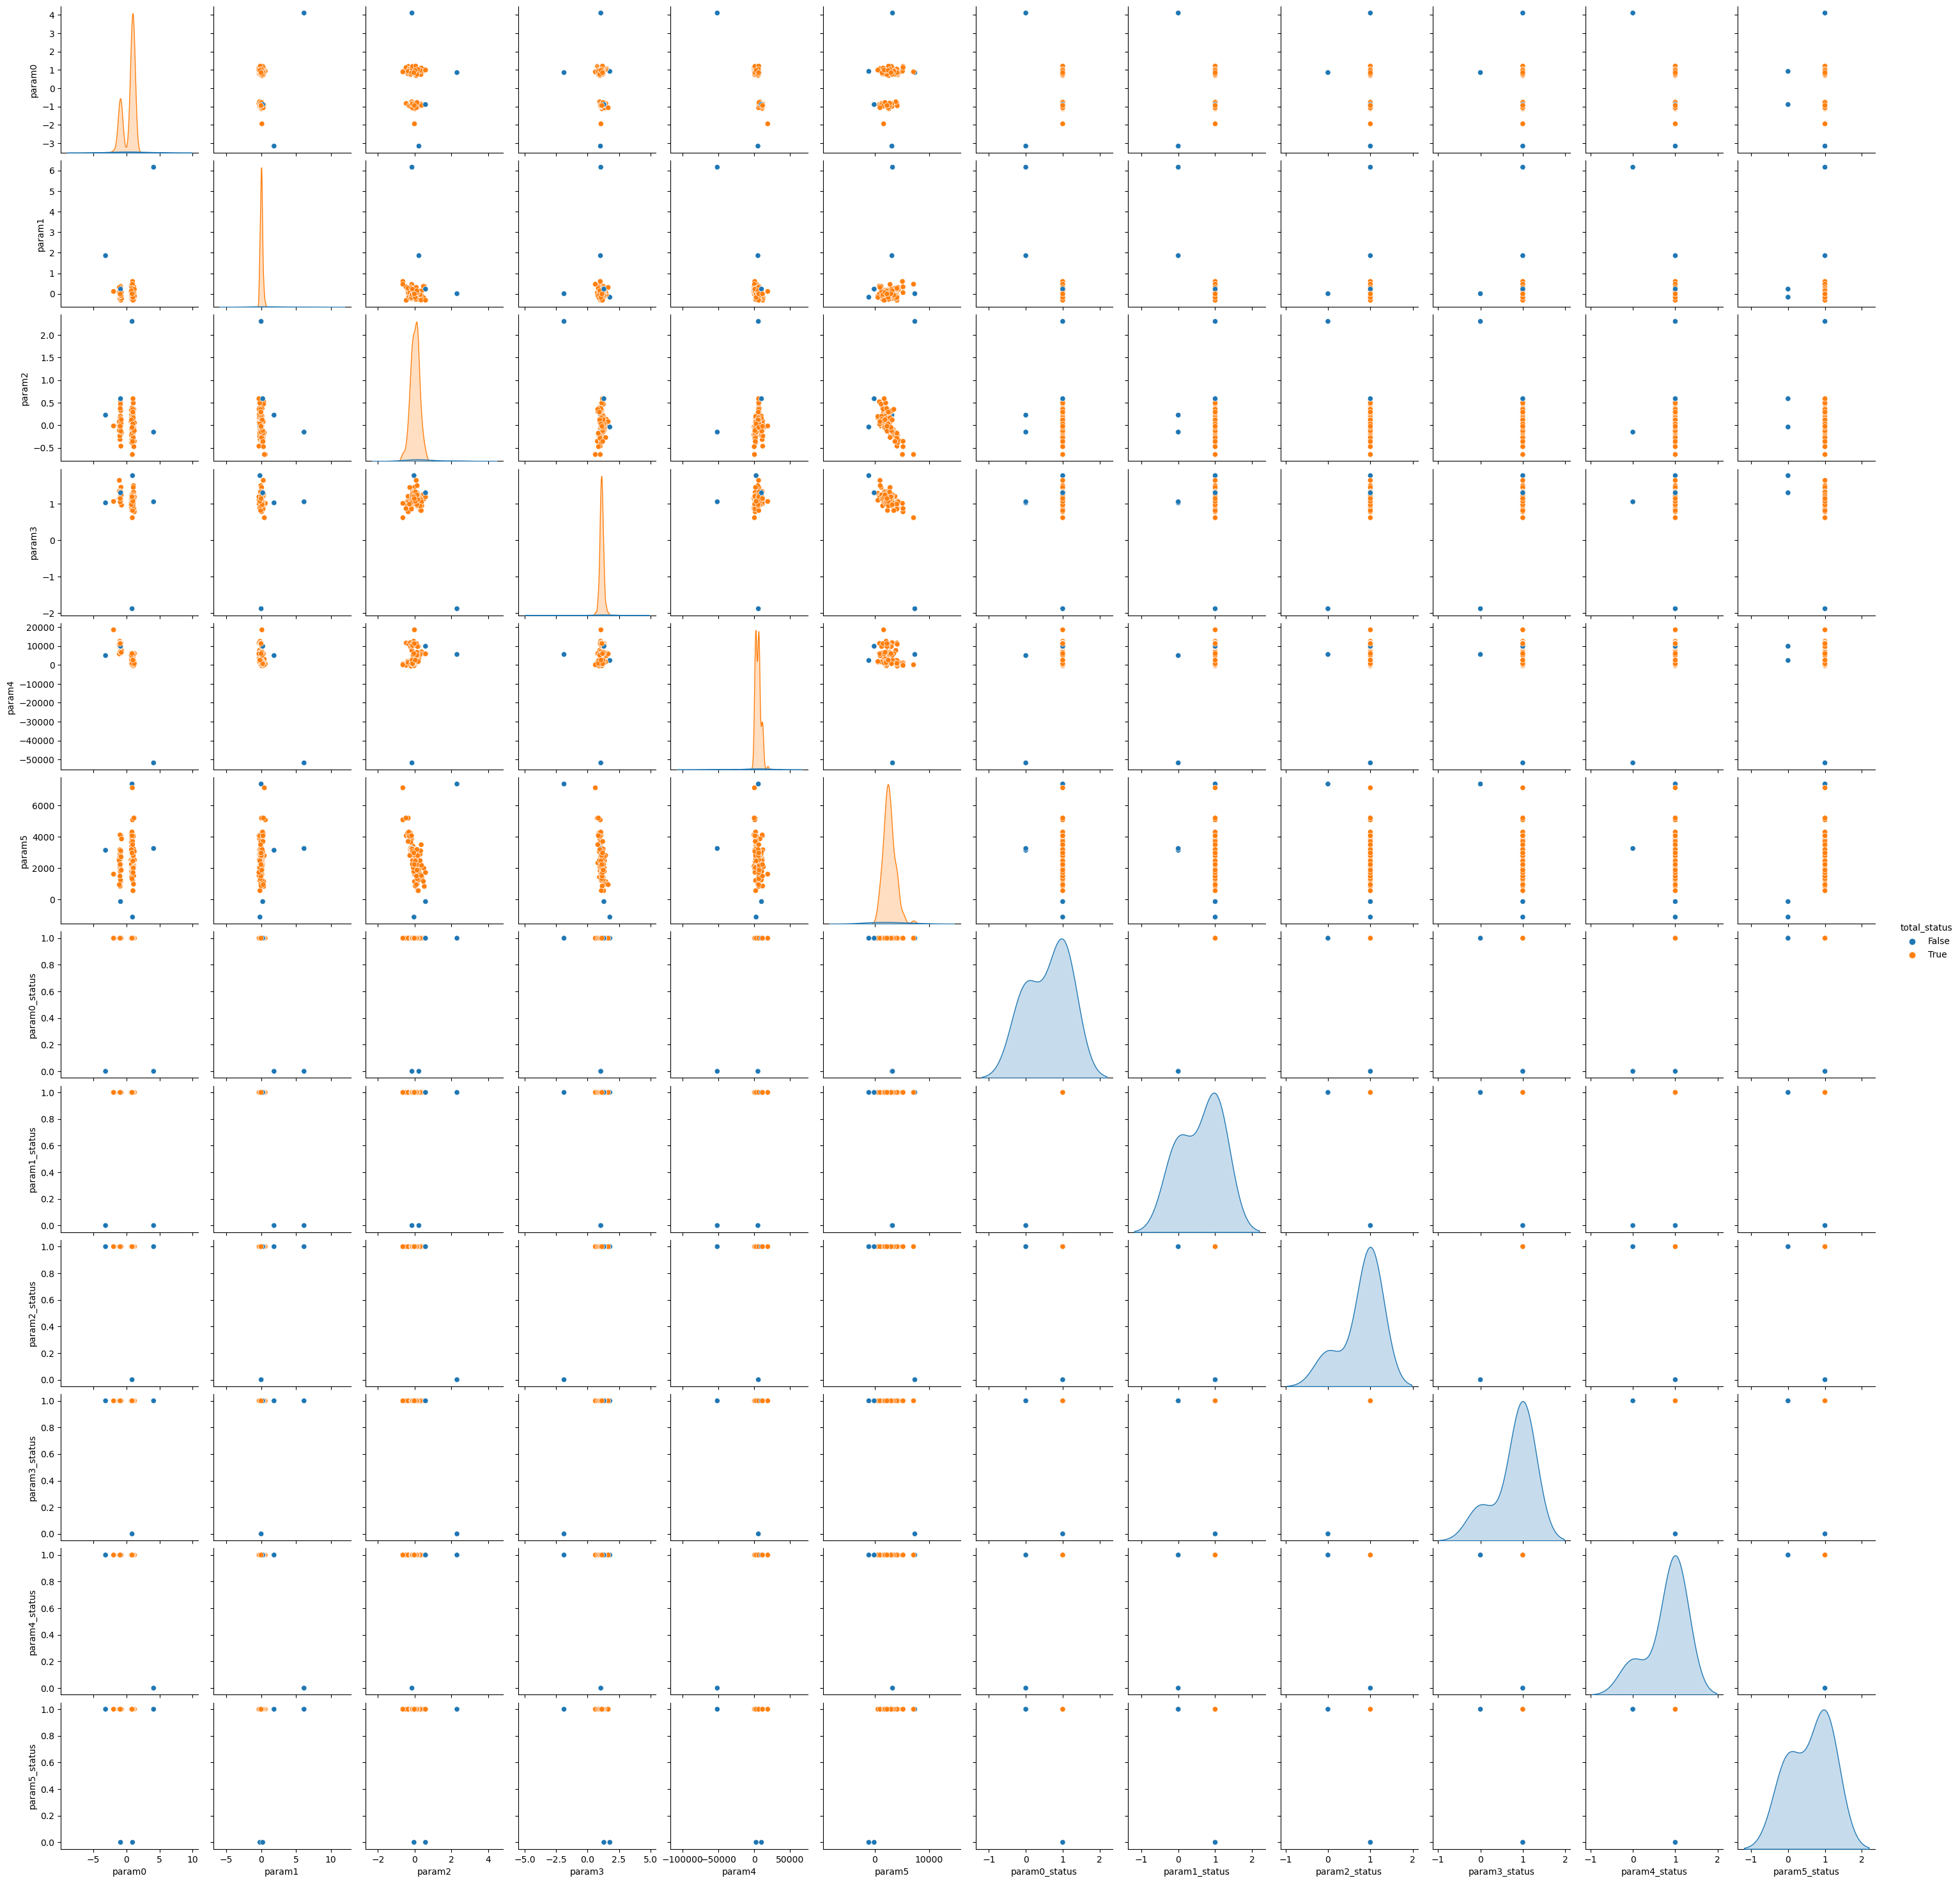

In [227]:
sns.pairplot(slice_df, hue='total_status')
